# Confidence intervals

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import time
import warnings
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import quantpy as qp

from tqdm import tqdm_notebook as tqdm

titlesize = 24
labelsize = 22
legendsize = 18
xticksize = 18
yticksize = xticksize

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)
matplotlib.rc('font', **{'family':'serif'})
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
matplotlib.rc('text.latex', preamble=r'\usepackage[english]{babel}')
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

warnings.filterwarnings('ignore', category=np.ComplexWarning)

np.set_printoptions(precision=5, suppress=15)

%matplotlib inline

## Quantum states

In [2]:
rho = qp.Qobj([1, 0], is_ket=True)  # |0>
rho

Quantum object
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

Performing tomography with linear inversion

In [3]:
n_measurements = 10 ** 4
stmg = qp.StateTomograph(rho)
stmg.experiment(n_measurements)
rho_est = stmg.point_estimate()
rho_est

Quantum object
array([[ 0.99989+0.j, -0.01053+0.j],
       [-0.01053+0.j,  0.00011+0.j]])

Bootstrapping samples from the distribution generated by new point estimate

In [4]:
n_boot = 10 ** 4
dst = stmg.bootstrap(n_boot)

Plot confidence interval

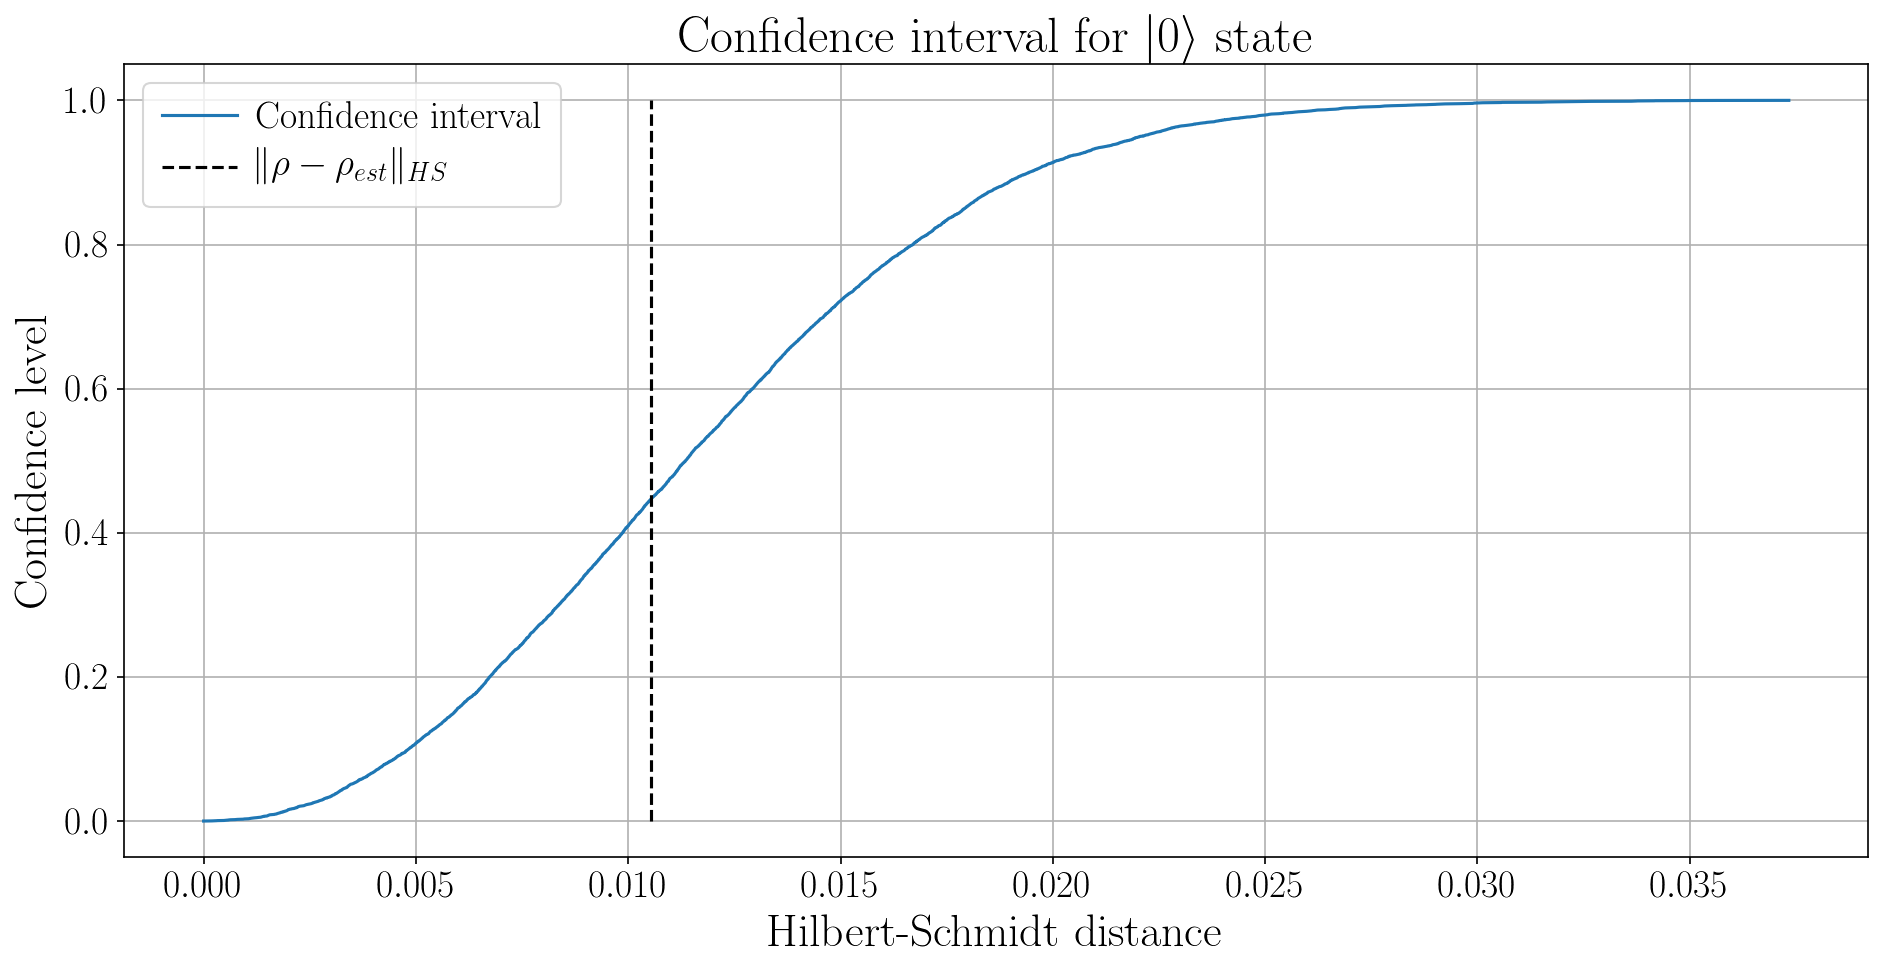

In [5]:
plt.figure(figsize=(15, 7), dpi=150)
plt.plot(dst, np.linspace(0, 1, n_boot + 1), '-', label='Confidence interval')
plt.plot([qp.hs_dst(rho, rho_est)] * 2, [0, 1], '--k', label='$\\|\\rho-\\rho_{est}\\|_{HS}$')
plt.grid()
plt.xlabel('Hilbert-Schmidt distance')
plt.ylabel('Confidence level')
plt.title('Confidence interval for $\\left|0\\right\\rangle$ state')
plt.legend()
plt.savefig('pictures/ci_qst_zero.png')
plt.show()

## Quantum channels

In [27]:
channel = qp.operator.X.as_channel()
channel.kraus

[Quantum Operator
 array([[-0.+0.j,  1.+0.j],
        [ 1.+0.j, -0.+0.j]])]

Performing tomography with linear inversion

In [28]:
n_measurements = 10 ** 4
ptmg = qp.ProcessTomograph(channel)
ptmg.experiment(n_measurements)
channel_est = ptmg.point_estimate()

Check if estimated channel is close to X gate by transforming $|0\rangle$ state

In [36]:
rho = qp.Qobj([1, 0], is_ket=True)
rho_one = qp.Qobj([0, 1], is_ket=True)
# qp.hs_dst(channel_est.transform(rho), rho_one)
channel_est.transform(rho)

Quantum object
array([[ 0.003 +0.j     , -0.0047-0.01305j],
       [-0.0047+0.01305j,  0.997 -0.j     ]])

Bootstrapping samples from the distribution generated by new point estimate

In [29]:
n_boot = 10 ** 4
dst = ptmg.bootstrap(n_boot, cptp=False)

Plot convfidence interval

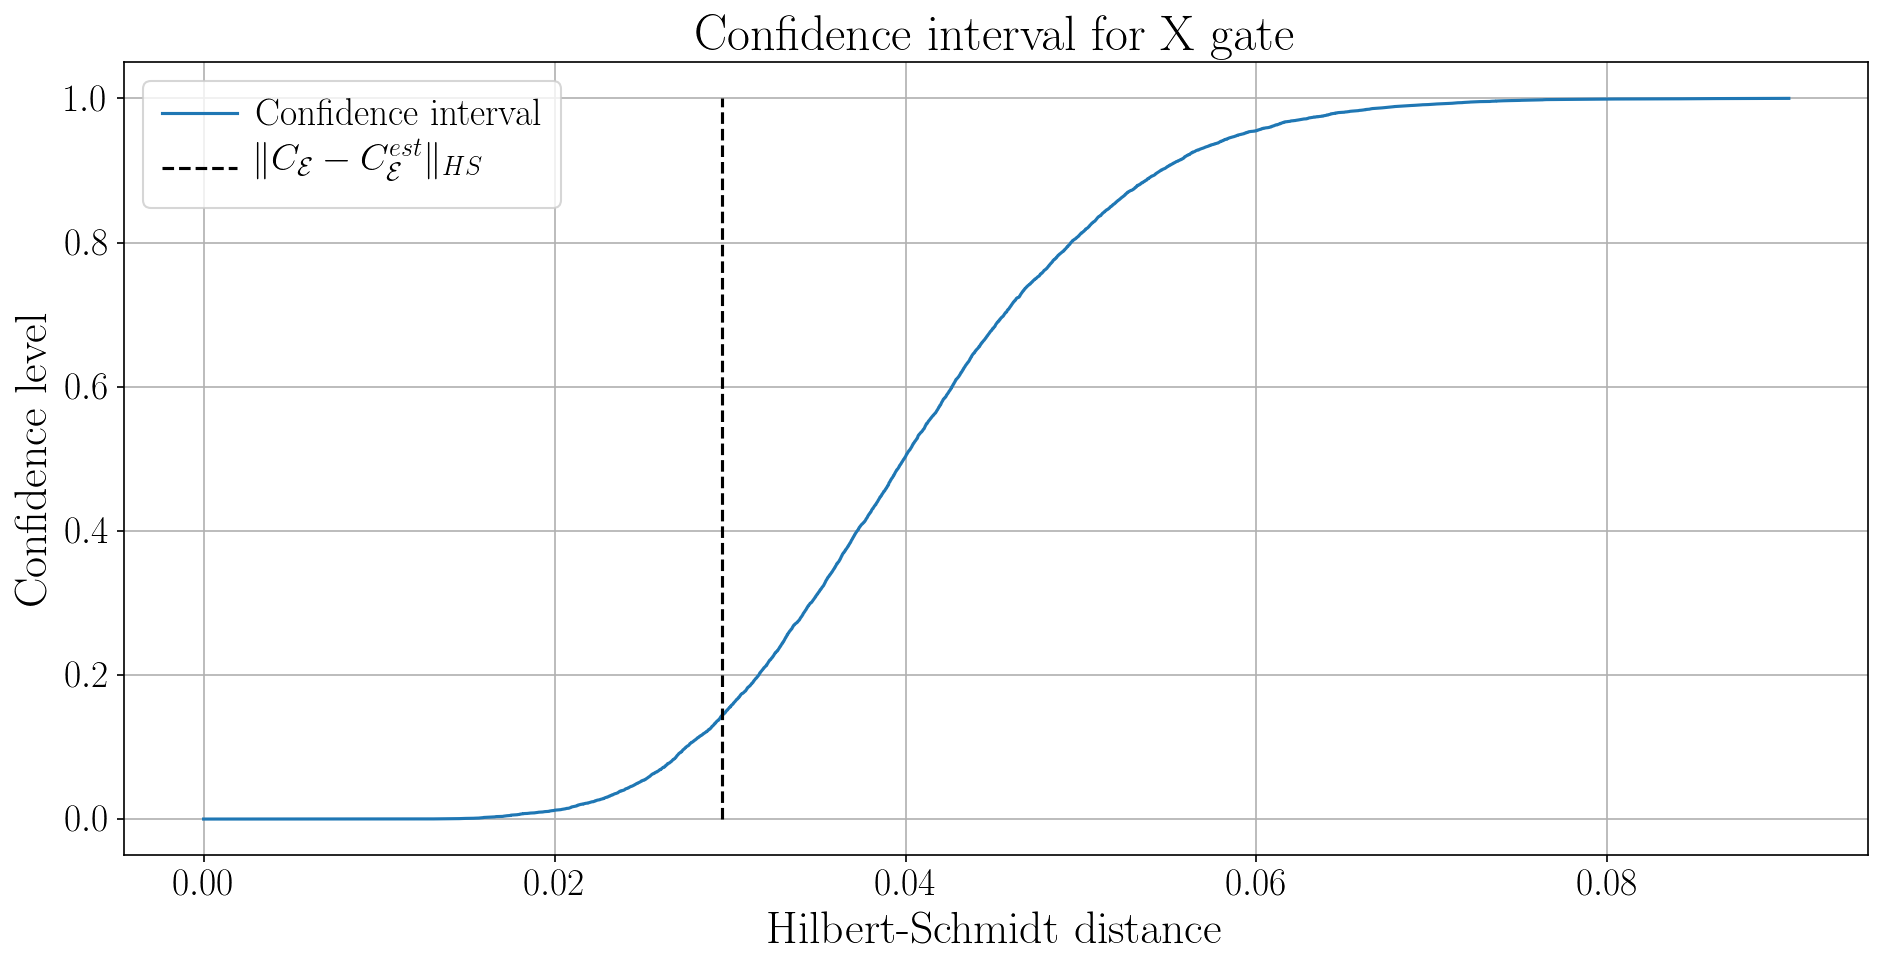

In [38]:
plt.figure(figsize=(15, 7), dpi=150)
plt.plot(dst, np.linspace(0, 1, n_boot + 1), '-', label='Confidence interval')
plt.plot([qp.hs_dst(channel.choi, channel_est.choi)] * 2, [0, 1], '--k', label='$\\|C_{\\mathcal{E}}-C_{\\mathcal{E}}^{est}\\|_{HS}$')
plt.grid()
plt.xlabel('Hilbert-Schmidt distance')
plt.ylabel('Confidence level')
plt.title('Confidence interval for X gate')
plt.legend()
plt.savefig('pictures/ci_qpt_x_gate.png')
plt.show()